# Exploratory Data Analysis

The NBA data has already been cleaned and combined into a single dataframe.

The purpose of this notebook is to gain a better understanding of the data and it will include a lot of visual plots and charts.  If there are any correlations between variables in this data they should be found here.  A correlation with the salary of a player is what I am most interested in here.

## Import Packages and Load Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # Cross-sectional models and methods used for regression.
from statsmodels.graphics.api import abline_plot # Plot a line given an intercept and slope.
from sklearn.metrics import mean_squared_error, r2_score # Mean squared error regression loss, R**2 (coefficient of determination) regression score function.
from sklearn.model_selection import train_test_split #  Split arrays or matrices into random train and test subsets.
from sklearn import linear_model, preprocessing # Ordinary least squares Linear Regression, provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
df = pd.read_csv('NBA clean data', index_col=0)
df.head()

,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,...,STL,BLK,TOV,PF,PTS,Signed Using,Team,Salary (millions),Team Value (Billions),Market Size
163,Stephen Curry,PG,32,29,29,987,10.6,21.5,0.492,5.3,...,1.3,0.1,3.4,2.0,31.7,Early Bird Rights,GSW,40.231758,4.7,large
117,Chris Paul,PG,35,26,26,843,7.3,14.9,0.489,1.6,...,1.4,0.3,2.6,3.0,19.1,Early Bird Rights,PHO,38.506482,1.7,medium
193,Russell Westbrook,PG,32,19,19,631,7.9,19.4,0.406,1.3,...,0.9,0.4,5.4,3.1,20.5,Early Bird Rights,WAS,38.178000,1.8,medium
308,John Wall,PG,30,19,19,591,8.6,19.5,0.441,2.4,...,1.2,0.8,4.0,1.6,23.6,Early Bird Rights,HOU,37.800000,2.5,large
329,LeBron James,PG,36,29,29,1006,9.8,19.5,0.504,2.6,...,1.1,0.5,3.9,1.6,26.6,Cap Space,LAL,37.436858,4.6,large


In [3]:
# Get some basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 163 to 92
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player                 344 non-null    object 
 1   Pos                    344 non-null    object 
 2   Age                    344 non-null    int64  
 3   G                      344 non-null    int64  
 4   GS                     344 non-null    int64  
 5   MP                     344 non-null    int64  
 6   FG                     344 non-null    float64
 7   FGA                    344 non-null    float64
 8   FG%                    344 non-null    float64
 9   3P                     344 non-null    float64
 10  3PA                    344 non-null    float64
 11  3P%                    344 non-null    float64
 12  2P                     344 non-null    float64
 13  2PA                    344 non-null    float64
 14  2P%                    344 non-null    float64
 15  FT   

## First Question:
### How do salaries vary by position?

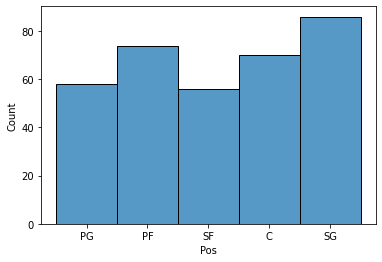

In [4]:
# Plot distribution of positions
sns.histplot(data=df, x='Pos')
plt.show()

In [5]:
# Look at the difference in salary between different positions
df.groupby('Pos')['Salary (millions)'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,70.0,9.990391,9.277320,0.050752,2.355241,4.931020,16.171910,28.000000
PF,74.0,8.996764,9.728312,0.350189,2.168052,4.016720,13.169086,37.199000
PG,58.0,11.799814,12.437349,0.091557,2.259834,6.825460,18.297619,40.231758
SF,56.0,8.340985,9.849305,0.050752,1.618520,3.560993,11.622062,33.005556
SG,86.0,5.969607,6.251578,0.155647,1.779308,3.171204,8.631042,27.556959


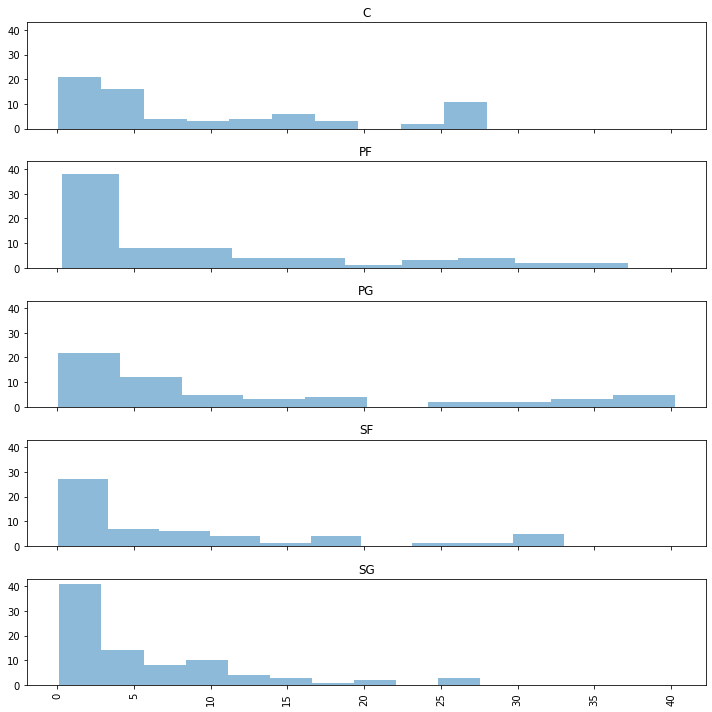

In [6]:
# Visualize on equal axes
df['Salary (millions)'].hist(by=df['Pos'], alpha=0.5, figsize=(10,10), sharex=True, sharey=True, layout=(5,1));
plt.tight_layout();
plt.show()

The histograms show that the salary in each position is not normally distributed.  In every position, the distribution has a long tail to the right.  This makes sense, since there are a few superstars that make tons of money whereas the majority of players make a lower salary.

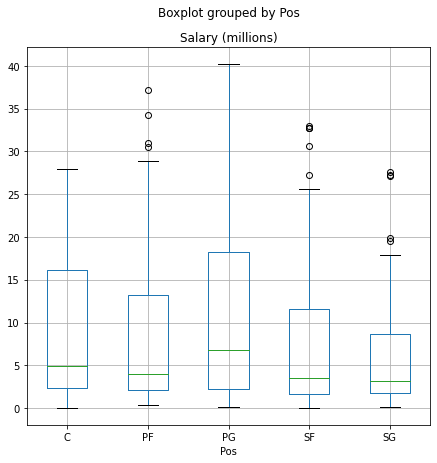

In [7]:
df.boxplot(column=['Salary (millions)'], by='Pos', figsize=(7,7));

From this boxplot it is clear that SG tend to have lower salaries than other positions.  SGs have the lowest median salary, as well as the lowest upper quartile range end point.  PGs on the other hand, tend to have higher salaries than all other positions.

## Salary Correlation with Player Stats

A good place to start looking for a correlation with salary, regardless of position, seems to be PTS.  Typically, a high scoring player expects to be paid more than a low scoring player.

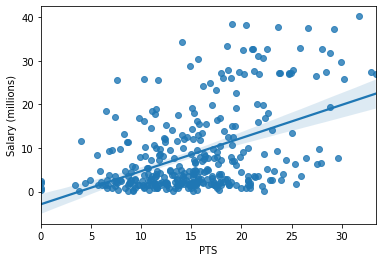

In [8]:
# Examine relationship between salary and PTS
sns.regplot(x='PTS', y='Salary (millions)', data=df);

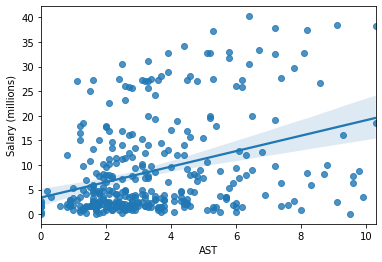

In [9]:
# Examine the relationship between salary and AST
sns.regplot(x='AST', y='Salary (millions)', data=df);

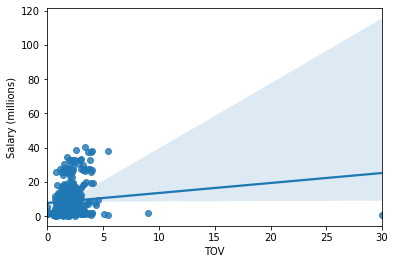

In [10]:
# Examine the relationship between salary and TOV
sns.regplot(x='TOV', y='Salary (millions)', data=df);

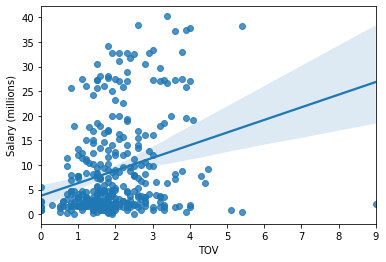

In [11]:
# Temporarily remove the outlier at 30 TOV
df_temp = df[df['TOV'] < 25]
sns.regplot(x='TOV', y='Salary (millions)', data=df_temp);

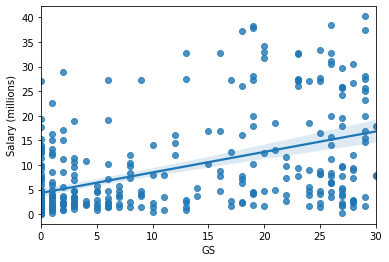

In [12]:
# Examine the relationship between salary and GS
sns.regplot(x='GS', y='Salary (millions)', data=df);

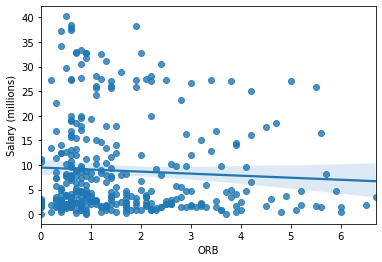

In [13]:
# Examine the relationship between salary and ORB
sns.regplot(x='ORB', y='Salary (millions)', data=df);

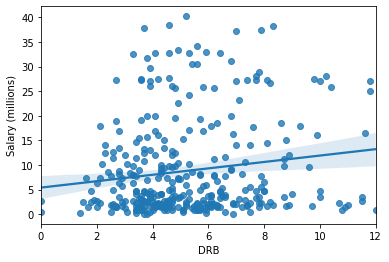

In [14]:
# Examine the relationship between salary and DRB
sns.regplot(x='DRB', y='Salary (millions)', data=df);

While there are some slight positive correlations with most of the key stats, there is a dense cluster of lower salaries in each plot.  Since we are dealing with per 36 stats, the stat value represents what a player would be expected to do in 36 minutes in a game, regardless of how long they actually played.  One possible explanation for the cluster is that players who do not play much tend to get minutes near the end of blowout games.  For example, if a player is in the game for the final 6 minutes and manages to score 3 points against the opponent's bench players, that will give him a per36 PTS stat of 18.  There is a big difference between that situation and a player who plays a full 36 minutes and scores 18 points against the opponent's first team.  The outlier in TOV (30) is also likely explained by this problem. The most logical explanation for the player having 30 TOV per 36 minutes is that he played for a very short amount of time and made a few turnovers, and that value is now being extrapolated out to 36 minutes.  For example, a player who only played one minute and turned the ball over once would have a per36 TOV stat of 36.

Another possible explanation for this cluster is contract type.  Especially for young players, it is possible to sign a long term contract and over the course of 2 or 3 years the player gets much better.  By the final year of the contract the player can be playing well above the level he is being paid for, but he is still locked into that contract.

Because of these two things, it seems like the relationship between stats and salary is not as simple as it may seem.

In [15]:
# Investigate the minutes played and games played in the dataset
mins = df['MP'].describe()
games = df['G'].describe()
print(mins, games)

count     344.000000
mean      491.747093
std       289.874493
min         6.000000
25%       245.750000
50%       501.500000
75%       722.500000
max      1101.000000
Name: MP, dtype: float64 count    344.000000
mean      20.406977
std        7.481176
min        1.000000
25%       15.000000
50%       23.000000
75%       27.000000
max       30.000000
Name: G, dtype: float64


On average, a player in the dataset played 491 minutes across 20 games, or 24.5 minutes per game out of a possible 48 minutes. A player getting this much game time should not be affected too much by the situations that create outliers that were described previously. 

The lowest MP was 6, and the lowest G was 1.  This is representative of a player or players that did not get much time at all, possibly a player who got into the game during the final minutes when the result was already determined.  Players without much game time are difficult to assess in this data analysis since all stats are based on performance over 36 minutes of game time.  A rough analogy is a runner who sprints 1 mile and stops, then takes the 1 mile time and multiplies it by 26.2 to see how long it would take to run a marathon.  Just as the marathon estimate would likely be innacurate, some of the per36 stats for these low game time players is likely innacurate.  For this reason players who have not played the equivalent of 1 full game (48 total minutes) will be removed from the dataset.

In [16]:
# Drop players with very little game time
df = df[df['MP'] >= 48]

# Review the new MP and G information
mins = df['MP'].describe()
games = df['G'].describe()
print(mins, games)

count     318.000000
mean      529.789308
std       267.763355
min        50.000000
25%       313.250000
50%       533.000000
75%       738.000000
max      1101.000000
Name: MP, dtype: float64 count    318.000000
mean      21.669811
std        6.212415
min        3.000000
25%       17.000000
50%       23.000000
75%       27.000000
max       30.000000
Name: G, dtype: float64


Now it's time to identify the other important stats to eventually include in the model.  A correlation map can be used to look at the top 10.

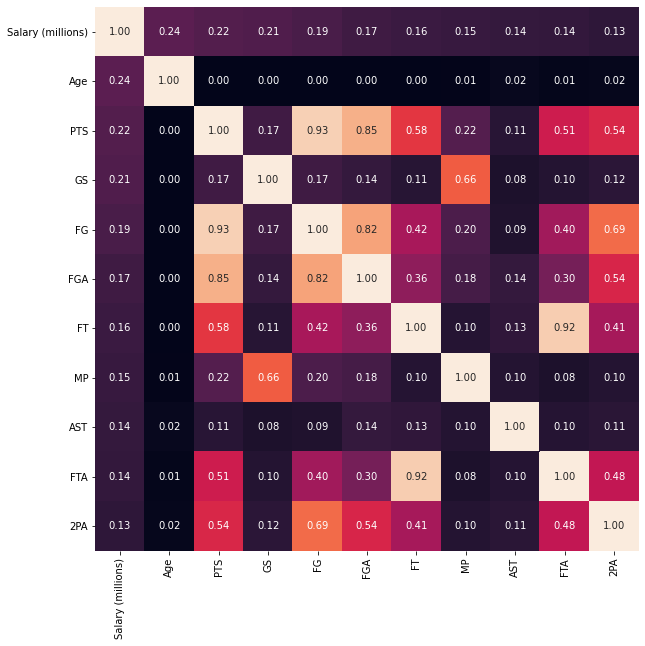

In [17]:
corr = df.corr()
r2 = corr ** 2
n = 11
cols = r2.nlargest(n, 'Salary (millions)')['Salary (millions)'].index
cm = df[cols].corr()
cm_square = cm ** 2
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm_square, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
           xticklabels=cols.values)
plt.show()

The heatmap shows the top 10 stats correlated to salary.  None of them have a particulary high correlation. Surprisingly it is not a players performance that seems to be correlated most with salary, but his age.

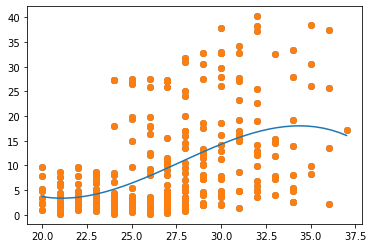

In [18]:
# Examine the relationship between age and salary, using some basic logic it can be assumed that this is not
# a linear relationship, since players are expected to earn the most during their prime years
x = df['Age']
y = df['Salary (millions)']
plt.scatter(x, y);

poly = np.poly1d(np.polyfit(x, y, 3))
line = np.linspace(20, 37, 40)

plt.scatter(x, y)
plt.plot(line, poly(line))
plt.show()

Of the other top 10 stats correlated to salary, several seem like they may be colinnear.  For example PTS and FGA.  A pairplot can help visualize this.

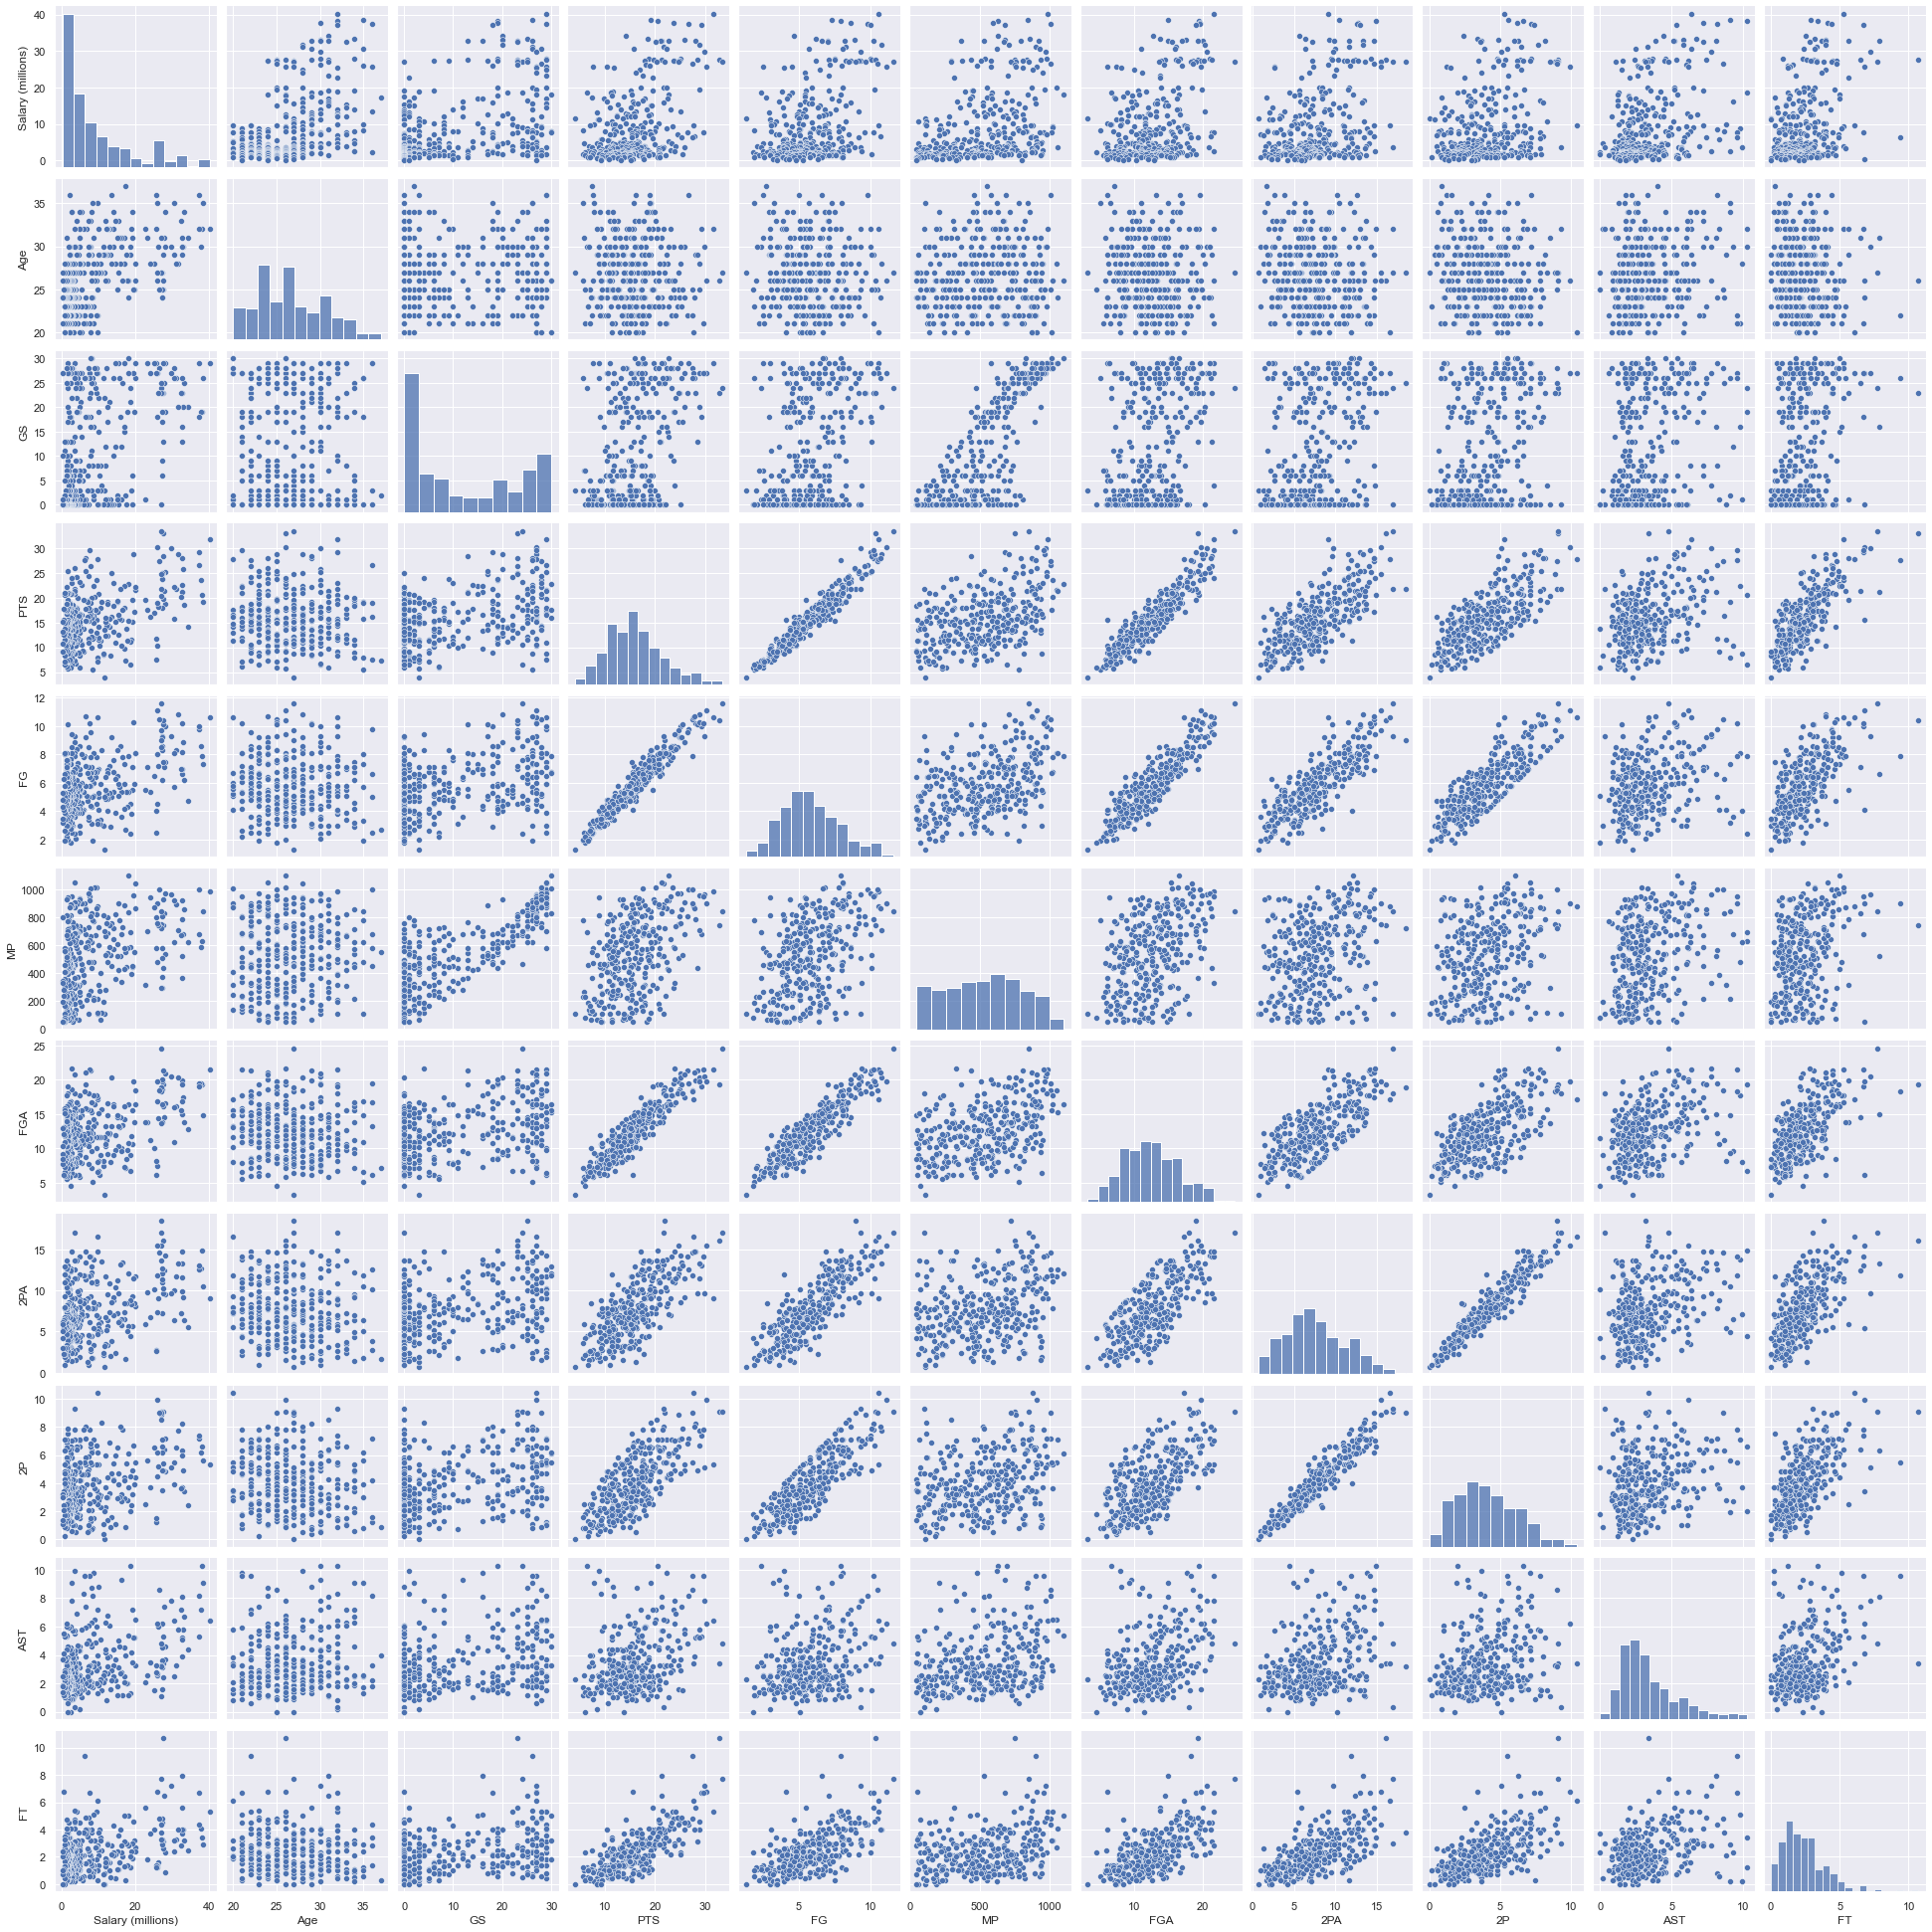

In [19]:
stats = ['Salary (millions)', 'Age', 'GS', 'PTS', 'FG', 'MP', 'FGA', '2PA', '2P', 'AST', 'FT']

sns.set()
sns.pairplot(df[stats], height=2.5, aspect=1)
plt.show()

There are some clear collinear features here.  In a different situation, I might eliminate some features since they are not adding a lot of value.  Since this is a relatively small dataset I am deciding to keep all the features, but it is still important to know that not all features are independent of each other.

## Exploring Signing Type

In [20]:
# Take a look at the types of Signings
df['Signed Using'].unique()

array(['Early Bird Rights', 'Cap Space', 'Sign and Trade',
       'Maximum Salary', '1st Round Pick', 'Minimum Salary', 'MLE',
       'Non-Bird Exception', 'Room Exception', 'Bi-Annual Exception',
       'Unknown'], dtype=object)

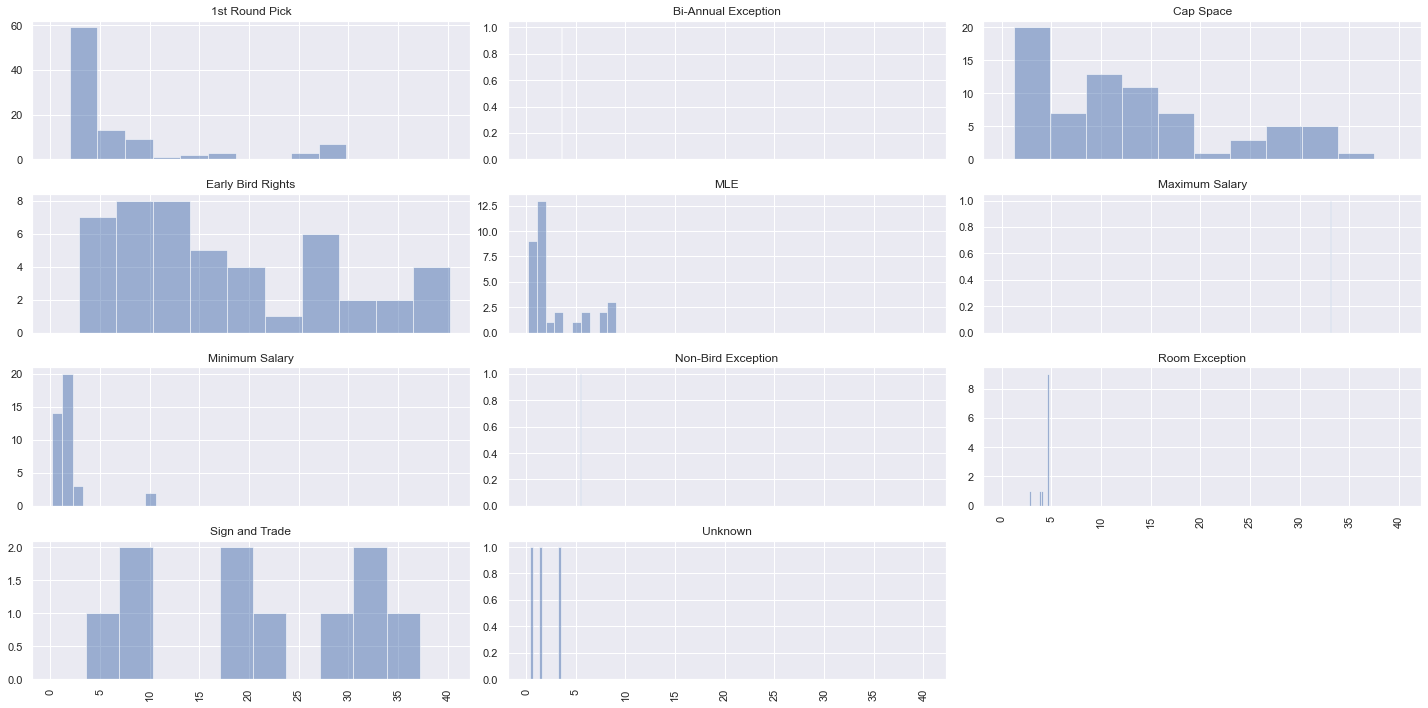

In [21]:
# Visualize the distribution of salaries depending on the type of signings
df['Salary (millions)'].hist(by=df['Signed Using'], alpha=0.5, figsize=(20,10), sharex=True, layout=(4, 3));
plt.tight_layout();
plt.show()

**Note that the histograms share a uniform x-axis (Salary (millions)) for easy visual comparison.  However, the y-axis is different for each histogram**
The above histograms reveal something interesting.  There are more than 60 1st Round Picks with salaries less than 5 million.  Compared to the other types of signings, this distribution is the most skewed.  This is perhaps because players are unproven when they first get drafted into the NBA, so their starting salaries can be lower than a more experienced player even if they end up performing equally.

## Save Data

During EDA it was identified that some players had very little game time and therefore their per36 stats are not as reliable as players who have played much more.  Those players have been removed in this notebook and the dataframe needs to be saved for use in pre-processing and modeling.

In [22]:
# Save data
df.to_csv('NBA Data post EDA')

# Conclusions

Overall, there seem to be trends and correlations that a model might be able to pick out and use to make salary predictions.  There also seem to be dangers inherent to the data and what it represents.  This is unavoidable unless a large portion of players is removed, but those players are necessary to work towards answering the initial problem statement.  Lasltly, it contract type appears to have an affect on a player's salary and this categorical feature could help a model make better predictions.